In [1]:
import os
import pandas
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

I got this dataset from kaggle . You can also get it and It is about some hiragana characters with the link : https://www.kaggle.com/datasets/farukece/handwritten-japanese-hiragana-characters

In [2]:
path_folder=Path("hiragana")
print("The folder contains this many images : ")
list_of_chars=os.listdir(path_folder)
print(len(list_of_chars))

The folder contains this many images : 
46


In [3]:
dataframe=pandas.DataFrame(
        [],columns=["Path","character"]
)

In [4]:
coutn=0

for label in os.listdir(path_folder):
        for img in os.listdir(path_folder/f"{label}"):
                dataframe.loc[coutn]=[f"{path_folder}/{label}/{img}",label]
                coutn+=1
print(coutn)


4569


In [5]:
list_of_images=list(path_folder.rglob("*.jpg"))
print(len(list_of_images))

4569


In [6]:
print(dataframe.shape)


(4569, 2)


In [7]:
print(dataframe.head(3))

                                      Path character
0  hiragana/aa/drawing_20250805_081803.jpg        aa
1  hiragana/aa/drawing_20250805_081823.jpg        aa
2  hiragana/aa/drawing_20250805_081827.jpg        aa


In [8]:
print(dataframe.isna().sum)

<bound method DataFrame.sum of        Path  character
0     False      False
1     False      False
2     False      False
3     False      False
4     False      False
...     ...        ...
4564  False      False
4565  False      False
4566  False      False
4567  False      False
4568  False      False

[4569 rows x 2 columns]>


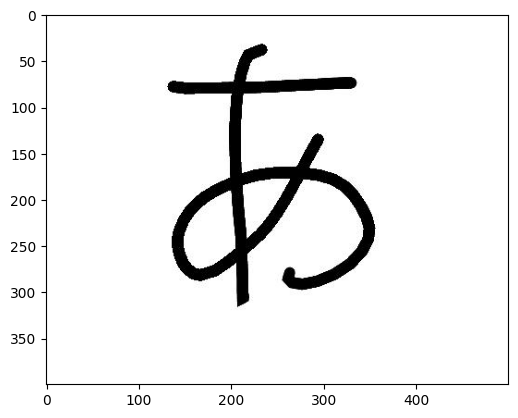

In [9]:
plt.imshow(Image.open(dataframe.iloc[0,0]))

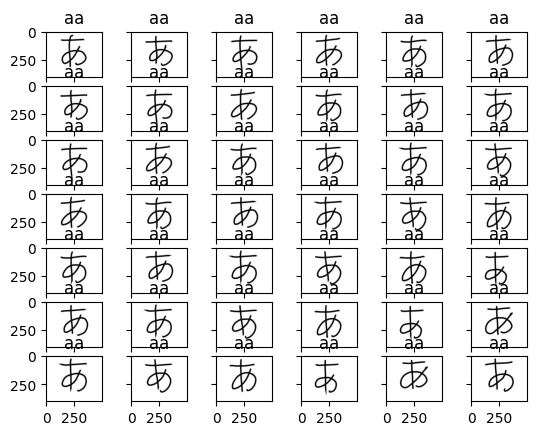

In [10]:
import matplotlib.image as mpimg
fig,ax=plt.subplots(
        ncols=6,
        nrows=7,
        sharex=True,
        sharey=True
)
for i in range(7):
        for j in range(6):
                ax[i,j].imshow(mpimg.imread(dataframe.iloc[i+j,0]))
                ax[i,j].set_title(Path(dataframe.iloc[i+j,0]).parent.stem)
plt.show()

In [11]:
dataframe.shape

(4569, 2)

In [12]:
dataframe["character"].value_counts()


character
no     100
so     100
oo     100
ra     100
re     100
ri     100
ro     100
ru     100
sa     100
se     100
shi    100
su     100
chi    100
ta     100
te     100
to     100
tsu    100
uu     100
wa     100
wo     100
ya     100
yo     100
nu     100
yu     100
nn     100
ni     100
ee     100
fu     100
ha     100
he     100
hi     100
ho     100
ii     100
ka     100
ke     100
ki     100
ko     100
ku     100
ma     100
me     100
mi     100
mo     100
mu     100
na     100
ne     100
aa      69
Name: count, dtype: int64

In [13]:
import torch as t

In [14]:
from torch.utils.data import  DataLoader
from torch.utils.data import  Dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataframe["character"]=encoder.fit_transform(dataframe["character"])

In [16]:
from sklearn.model_selection import train_test_split
X=dataframe["Path"]
y=dataframe["character"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3426,)
(1143,)
(3426,)
(1143,)


In [18]:
import torchvision
transformations=torchvision.transforms.Compose(
        [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.RandomHorizontalFlip(p=0.3),
                torchvision.transforms.Resize((224,224))
        ]
)

In [19]:
class Datasetter(Dataset):
        def __init__(self,x,y,transformations):
                self.x=x
                self.y=y
                self.transformations=transformations
        def __len__(self):
                return len(self.x)
        def __getitem__(self, index):
                x=Image.open(Path(self.x.iloc[index]))
                x=self.transformations(x)
                return x,t.tensor(self.y.iloc[index])
                

In [20]:
train_dataset=Datasetter(x_train,y_train,transformations)
print(train_dataset.__len__())

3426


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].


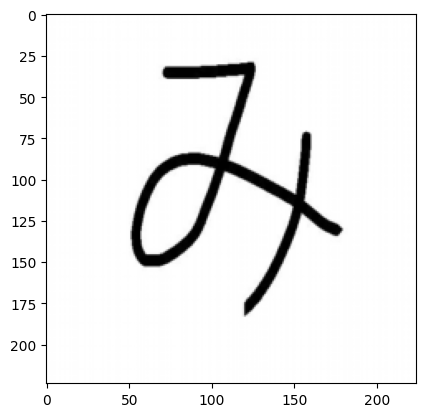

In [21]:
plt.imshow(train_dataset[100][0].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].


1143


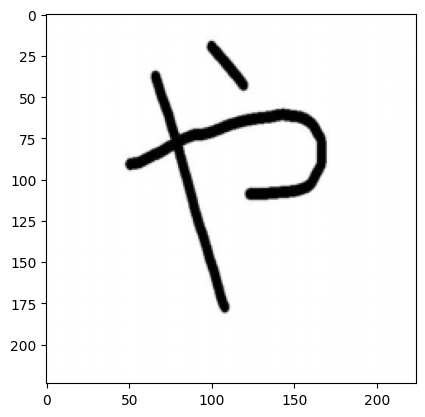

In [22]:
test_dataset=Datasetter(x_test,y_test,transformations)
plt.imshow(test_dataset[10][0].permute(1,2,0))

print(test_dataset.__len__())

In [23]:
print(train_dataset.__len__())
print(test_dataset.__len__())

3426
1143


In [24]:
train_dataloader=DataLoader(dataset=train_dataset,shuffle=True,drop_last=True,batch_size=32,num_workers=0)
test_dataloader=DataLoader(dataset=test_dataset,shuffle=True,batch_size=32,drop_last=True,num_workers=0)


In [25]:
len(train_dataloader),len(test_dataloader)

(107, 35)

In [26]:
for i,(X,y) in enumerate(test_dataloader):
        print(f"Batch : {i}")
        print(X.shape)
        print(y.shape)

Batch : 0
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 1
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 2
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 3
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 4
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 5
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 6
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 7
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 8
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 9
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 10
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 11
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 12
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 13
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 14
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 15
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 16
torch.Size([32, 3, 224, 224])
torch.Size([32])
Batch : 17
torch.Size([3

In [27]:
class Torch_Model(t.nn.Module):
        def __init__(self,):
                super().__init__()
                self.layer1=t.nn.Sequential(
                        t.nn.Conv2d(in_channels=3,out_channels=64,kernel_size=25,stride=1,padding=0),#200,200
                        t.nn.ReLU(True),
                        t.nn.Conv2d(in_channels=64,out_channels=128,kernel_size=18,stride=2,padding=8),
                        t.nn.ReLU(True),
                        t.nn.MaxPool2d(2)
                )
                self.layer2=t.nn.Sequential(
                        t.nn.Conv2d(in_channels=128,out_channels=256,kernel_size=4,padding=1,stride=1),
                        t.nn.ReLU(True),
                        t.nn.Conv2d(in_channels=256,out_channels=300,kernel_size=6,padding=2,stride=2),
                        t.nn.ReLU(True),
                        t.nn.MaxPool2d(kernel_size=2,stride=2)
                )
                self.layer3=t.nn.Sequential(
                        t.nn.Flatten(start_dim=-3,end_dim=-1),
                        t.nn.Linear(300*12*12,300),
                        t.nn.LeakyReLU(0.2),
                        t.nn.Linear(300,len(list_of_chars))
                )
        def forward(self,x):
                return self.layer3(self.layer2(self.layer1(x)))
        

In [28]:
# (input_size-kernel+2*padding)/stride  + 1
Model=Torch_Model()

In [29]:

output=Model(t.rand(size=(3,224,224)))
output.shape

torch.Size([46])

In [30]:
len(list_of_chars)

46

In [31]:
list_of_chars

['aa',
 'chi',
 'ee',
 'fu',
 'ha',
 'he',
 'hi',
 'ho',
 'ii',
 'ka',
 'ke',
 'ki',
 'ko',
 'ku',
 'ma',
 'me',
 'mi',
 'mo',
 'mu',
 'na',
 'ne',
 'ni',
 'nn',
 'no',
 'nu',
 'oo',
 'ra',
 're',
 'ri',
 'ro',
 'ru',
 'sa',
 'se',
 'shi',
 'so',
 'su',
 'ta',
 'te',
 'to',
 'tsu',
 'uu',
 'wa',
 'wo',
 'ya',
 'yo',
 'yu']

In [32]:
from torchinfo import summary
summary(
        Model,
        input_size=(32,3,224,224)
)

Layer (type:depth-idx)                   Output Shape              Param #
Torch_Model                              [32, 46]                  --
├─Sequential: 1-1                        [32, 128, 50, 50]         --
│    └─Conv2d: 2-1                       [32, 64, 200, 200]        120,064
│    └─ReLU: 2-2                         [32, 64, 200, 200]        --
│    └─Conv2d: 2-3                       [32, 128, 100, 100]       2,654,336
│    └─ReLU: 2-4                         [32, 128, 100, 100]       --
│    └─MaxPool2d: 2-5                    [32, 128, 50, 50]         --
├─Sequential: 1-2                        [32, 300, 12, 12]         --
│    └─Conv2d: 2-6                       [32, 256, 49, 49]         524,544
│    └─ReLU: 2-7                         [32, 256, 49, 49]         --
│    └─Conv2d: 2-8                       [32, 300, 24, 24]         2,765,100
│    └─ReLU: 2-9                         [32, 300, 24, 24]         --
│    └─MaxPool2d: 2-10                   [32, 300, 12, 12]   

In [33]:
optimizer=t.optim.Adam(params=Model.parameters(),lr=0.001)
lossfn=t.nn.CrossEntropyLoss()

In [34]:
# epochs=5
# Model.to(t.float32)
# train_loss_list=[]
# test_loss_list=[]
# train_acc_list=[]
# test_acc_list=[]
# for epoch in range(epochs):
#         train_loss=0
#         test_loss=0
#         train_acc=0
#         test_acc=0
#         Model.train()
#         for (X,y) in train_dataloader:
#                 X=X.to(t.float32)
#                 y=y.to(t.long)
#                 y_preds=Model(X)
#                 loss=lossfn(y_preds,y)
#                 train_loss+=loss.item()*32
#                 train_acc+=(t.argmax(y_preds,dim=1)==y).sum().item()
#                 optimizer.zero_grad()
#                 loss.backward()
#                 optimizer.step()
#         Model.eval()
#         with t.inference_mode():
#                 for (x,y) in test_dataloader:
#                         x=x.to(t.float32)
#                         y=y.to(t.long)
#                         y_preds=Model(x)
#                         loss=lossfn(y_preds,y)
#                         test_loss+=loss.item()*32
#                         test_acc+=(t.argmax(y_preds,dim=1)==y).sum().item()
#         train_acc_list.append(train_acc/len(train_dataloader.dataset))
#         test_acc_list.append(test_acc/len(test_dataloader.dataset))
#         train_loss_list.append(train_loss/len(train_dataloader.dataset))
#         test_loss_list.append(test_loss/len(test_dataloader.dataset))
#         print(f"\033[1;36m {"==="*70} \033[0m")
#         print(f"Epoch : {epoch}")
#         print(f"Training Acc : {train_acc_list[epoch]}")
#         print(f"Testing Acc : {test_acc_list[epoch]}")
#         print(f"Training Loss : {train_loss_list[epoch]}")
#         print(f"Testing Loss : {test_loss_list[epoch]}")



In [35]:
# i run the model for 1 hour but it is still running so i stopped after running after 1 hour since no output is got.
# you can run it with gpus and i am using mobilenet now for this

In [36]:
New_model_weights=torchvision.models.MobileNet_V2_Weights.DEFAULT
auto_transforms=New_model_weights.transforms()
New_model=torchvision.models.mobilenet_v2(weights=New_model_weights)

In [43]:
for i in New_model.parameters():
        i.requires_grad=False

In [46]:
New_model


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [47]:
New_model.classifier=t.nn.Sequential(
        t.nn.Dropout(p=0.2,inplace=False),
        t.nn.Linear(in_features=1280,out_features=len(list_of_chars))
)

In [50]:
summary(New_model,input_size=(32,3,224,224))

Layer (type:depth-idx)                             Output Shape              Param #
MobileNetV2                                        [32, 46]                  --
├─Sequential: 1-1                                  [32, 1280, 7, 7]          --
│    └─Conv2dNormActivation: 2-1                   [32, 32, 112, 112]        --
│    │    └─Conv2d: 3-1                            [32, 32, 112, 112]        (864)
│    │    └─BatchNorm2d: 3-2                       [32, 32, 112, 112]        (64)
│    │    └─ReLU6: 3-3                             [32, 32, 112, 112]        --
│    └─InvertedResidual: 2-2                       [32, 16, 112, 112]        --
│    │    └─Sequential: 3-4                        [32, 16, 112, 112]        (896)
│    └─InvertedResidual: 2-3                       [32, 24, 56, 56]          --
│    │    └─Sequential: 3-5                        [32, 24, 56, 56]          (5,136)
│    └─InvertedResidual: 2-4                       [32, 24, 56, 56]          --
│    │    └─Sequential

In [51]:
train_dataset=Datasetter(x_train,y_train,transformations=auto_transforms)
test_dataset=Datasetter(x_test,y_test,transformations=auto_transforms)


In [52]:
len(train_dataset),len(test_dataset)

(3426, 1143)

In [53]:
train_dataloader=DataLoader(dataset=train_dataset,drop_last=True,shuffle=True,batch_size=32)
test_dataloader=DataLoader(dataset=test_dataset,drop_last=True,shuffle=True,batch_size=32)


In [54]:
for x,y in train_dataloader:
        print(x.shape)
        print(y.shape)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [55]:
print(auto_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [56]:
output=New_model(t.rand(32,3,224,224))
print(output.shape)

torch.Size([32, 46])


In [58]:
epochs=5
New_model.to(t.float32)
train_loss_list=[]
test_loss_list=[]
train_acc_list=[]
test_acc_list=[]
for epoch in range(epochs):
        train_loss=0
        test_loss=0
        train_acc=0
        test_acc=0
        New_model.train()
        for (X,y) in train_dataloader:
                X=X.to(t.float32)
                y=y.to(t.long)
                y_preds=New_model(X)
                loss=lossfn(y_preds,y)
                train_loss+=loss.item()*32
                train_acc+=(t.argmax(y_preds,dim=1)==y).sum().item()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        New_model.eval()
        with t.inference_mode():
                for (x,y) in test_dataloader:
                        x=x.to(t.float32)
                        y=y.to(t.long)
                        y_preds=New_model(x)
                        loss=lossfn(y_preds,y)
                        test_loss+=loss.item()*32
                        test_acc+=(t.argmax(y_preds,dim=1)==y).sum().item()
        train_acc_list.append(train_acc/len(train_dataloader.dataset))
        test_acc_list.append(test_acc/len(test_dataloader.dataset))
        train_loss_list.append(train_loss/len(train_dataloader.dataset))
        test_loss_list.append(test_loss/len(test_dataloader.dataset))
        print(f"\033[1;36m {"==="*70} \033[0m")
        print(f"Epoch : {epoch}")
        print(f"Training Acc : {train_acc_list[epoch]}")
        print(f"Testing Acc : {test_acc_list[epoch]}")
        print(f"Training Loss : {train_loss_list[epoch]}")
        print(f"Testing Loss : {test_loss_list[epoch]}")



Epoch : 0
Training Acc : 0.020431990659661413
Testing Acc : 0.01399825021872266
Training Loss : 3.8549779345261306
Testing Loss : 3.7724412933109313
Epoch : 1
Training Acc : 0.01838879159369527
Testing Acc : 0.013123359580052493
Training Loss : 3.8545382333233285
Testing Loss : 3.773223102666366
Epoch : 2
Training Acc : 0.016929363689433742
Testing Acc : 0.01399825021872266
Training Loss : 3.8521676918114407
Testing Loss : 3.772602318257276
Epoch : 3
Training Acc : 0.022475189725627554
Testing Acc : 0.016622922134733157
Training Loss : 3.854025716609031
Testing Loss : 3.772770538730571
Epoch : 4
Training Acc : 0.021599532983070636
Testing Acc : 0.010498687664041995
Training Loss : 3.8527065506471367
Testing Loss : 3.7703933248578303


In [59]:
t.save(obj=New_model.state_dict(),f="hiragana_mobilenet.pth")